<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Customer-Behavior-Analysis--and-Prediction" data-toc-modified-id="Customer-Behavior-Analysis--and-Prediction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Customer Behavior Analysis  and Prediction</a></span><ul class="toc-item"><li><span><a href="#Project-Overview" data-toc-modified-id="Project-Overview-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Project Overview</a></span><ul class="toc-item"><li><span><a href="#Objective" data-toc-modified-id="Objective-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Objective</a></span></li><li><span><a href="#Variables-in-the-dataset" data-toc-modified-id="Variables-in-the-dataset-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Variables in the dataset</a></span></li></ul></li><li><span><a href="#Data-Wrangling" data-toc-modified-id="Data-Wrangling-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data Wrangling</a></span><ul class="toc-item"><li><span><a href="#Importing-libraries-and-loading-the-data" data-toc-modified-id="Importing-libraries-and-loading-the-data-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Importing libraries and loading the data</a></span></li><li><span><a href="#Cleaning,-transforming-and-visualizing-data" data-toc-modified-id="Cleaning,-transforming-and-visualizing-data-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Cleaning, transforming and visualizing data</a></span><ul class="toc-item"><li><span><a href="#---Categorical-Variables" data-toc-modified-id="---Categorical-Variables-1.2.2.1"><span class="toc-item-num">1.2.2.1&nbsp;&nbsp;</span>-  Categorical Variables</a></span></li><li><span><a href="#--Date-Time-Variable" data-toc-modified-id="--Date-Time-Variable-1.2.2.2"><span class="toc-item-num">1.2.2.2&nbsp;&nbsp;</span>- Date Time Variable</a></span></li><li><span><a href="#--Numeric-Features" data-toc-modified-id="--Numeric-Features-1.2.2.3"><span class="toc-item-num">1.2.2.3&nbsp;&nbsp;</span>- Numeric Features</a></span></li><li><span><a href="#--Organize-Columns-and-Create-New-Features" data-toc-modified-id="--Organize-Columns-and-Create-New-Features-1.2.2.4"><span class="toc-item-num">1.2.2.4&nbsp;&nbsp;</span>- Organize Columns and Create New Features</a></span></li><li><span><a href="#--A-visual-summary-of-the-expenses-of-people-in-different-age-groups" data-toc-modified-id="--A-visual-summary-of-the-expenses-of-people-in-different-age-groups-1.2.2.5"><span class="toc-item-num">1.2.2.5&nbsp;&nbsp;</span>- A visual summary of the expenses of people in different age groups</a></span></li></ul></li><li><span><a href="#Saving-data" data-toc-modified-id="Saving-data-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Saving data</a></span></li></ul></li></ul></li></ul></div>

# Customer Behavior Analysis  and Prediction

## Project Overview
### Objective
Investigate if the customer would accept an offer from marketing champaign or not and make predictions.
For this notebook, I'm using the dataset 'marketing_campaign.csv' downloaded from kaggle.

### Variables in the dataset
***
a. Customer information
 - Year_Birth: Customer's birth year
 - Education: Customer's education level
 - Marital_Status: Customer's marital status
 - Income: Customer's yearly household income
 - Kidhome: Number of children in customer's household
 - Teenhome: Number of teenagers in customer's household
 - Dt_Customer: Date of customer's enrollment with the company
 - Complain: if the customer complained in the last 2 years
***
b. Amount spent on each category in last 2 years
 - MntWines: Amount spent on wine
 - MntFruits: Amount spent on fruits
 - MntMeatProducts: Amount spent on meat
 - MntFishProducts: Amount spent on fish
 - MntSweetProducts: Amount spent on sweets
 - MntGoldProds: Amount spent on gold
***
c. Places where customers make the purchase
 - NumWebPurchases: Number of purchases made through the company’s website
 - NumCatalogPurchases: Number of purchases made using a catalog
 - NumStorePurchases: Number of purchases made directly in stores
 - NumWebVisitsMonth: Number of visits to company’s website in the last month
***
d. Promotion activities response
 - NumDealsPurchases: Number of purchases made with a discount
 - AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
 - AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
 - AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
 - AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
 - AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
 - Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

## Data Wrangling

This step focuses on importing data, organizing, and cleaning to make sure data's well defined.

### Importing libraries and loading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from datetime import datetime, date, timedelta
from library.sb_utils import save_file
%matplotlib inline

In [2]:
customer_df = pd.read_csv('marketing_campaign.csv', sep='\t')

In [3]:
customer_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
customer_df.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    0
Length: 2240, dtype: int64

In [5]:
customer_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

 - Check the data type using function .dtypes
 - No null values; 3 object (categorical)
 - Dt_Customer need to be parsed as date time. 

### Cleaning, transforming and visualizing data

#### -  Categorical Variables 

In [6]:
def bar_plot(variable):
    """
        input: variable ex: "Education"
        output: value count
    """
    # get feature
    var = customer_df[variable]
    # count the number of categorical variable
    varValue = var.value_counts()                                
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)                           
    plt.xticks(varValue.index, varValue.index.values)             
    plt.ylabel("Count")
    plt.title(variable)

    print("{}: \n{}".format(variable,varValue))

Education: 
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
Marital_Status: 
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


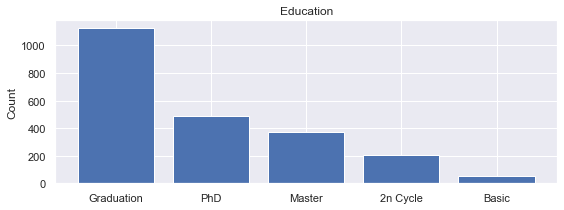

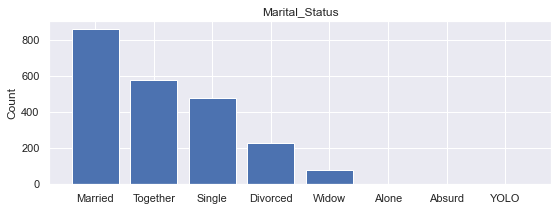

In [7]:
# visualize
sns.set()
category = ["Education","Marital_Status"]
for c in category :
    bar_plot(c)

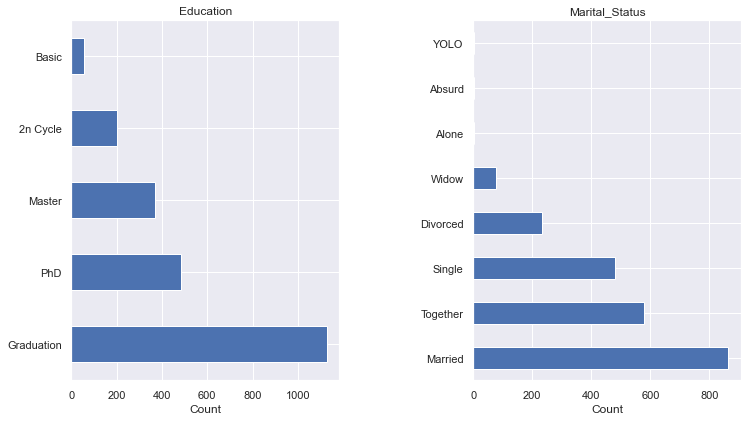

In [8]:
# Create two subplots on 1 row and 2 columns with a figsize of (12, 8)
fig, ax = plt.subplots(1, 2, figsize=(12,10))

# Specify a horizontal barplot ('barh') as kind of plot (kind=)
customer_df.Education.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('Education')
ax[0].set_xlabel('Count')

customer_df.Marital_Status.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('Marital_Status')
ax[1].set_xlabel('Count')

# Give the subplots a little "breathing room" with a wspace of 0.5
# keep the square figure size but put more margin around the subplots
plt.subplots_adjust(bottom=0.3, top=0.8, wspace=0.5, hspace=0);

#### - Date Time Variable

In [9]:
# use pd.to_datetime() to parse the values in the column 'Dt_Customer'
customer_df['Dt_Customer']= pd.to_datetime(customer_df.Dt_Customer)

In [10]:
# create a new feature 'year'
customer_df['Year'] = pd.to_datetime(customer_df.Dt_Customer).dt.year

#### - Numeric Features

In [11]:
# find the age of customers and save as a new feature 'Age' 
customer_df['Age'] = 2022 - customer_df.Year_Birth

In [12]:
# plot histogram
def hist_plot(variable):
    plt.figure(figsize = (7,4))
    plt.hist(customer_df[variable], bins = 100, density=True)  
    
    plt.xlabel(variable)
    plt.ylabel("Count")
    plt.title("Histogram of {} distribution".format(variable))

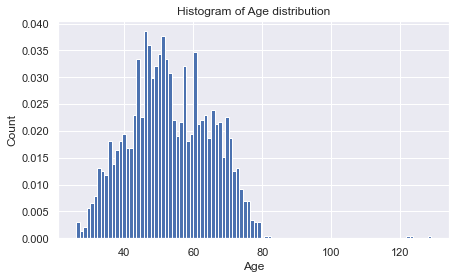

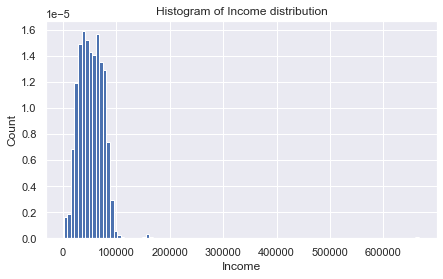

In [13]:
numeric_Var = ["Age", "Income"]
for n in numeric_Var:
    hist_plot(n)

#### - Organize Columns and Create New Features
 <br>
 Look at the customer features closely and re-organize them into new categories.

In [14]:
# rename the purchased products
old_names = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
new_names = ["Wines","Fruits","Meat", "Fish","Sweets","Gold"]
customer_df.rename(columns=dict(zip(old_names, new_names)), inplace=True)

In [15]:
customer_df.rename(columns={'Response': 'AcceptedCmp6'}, inplace=True)

In [16]:
# Organize 'Education' and combine the "Basic" and "2n Cycle" education level into an "Undergraduate" level
customer_df['Edu'] = customer_df.Education.replace({"Basic":"Undergrad","2n Cycle":"Undergrad", 
                                            "Graduation":"Grad", "Master":"Postgrad",
                                             "PhD":"Postgrad"})

In [17]:
# use 'single' and 'couple' in relationships
customer_df['Household'] = customer_df.Marital_Status.replace({"Married":"couple","Together":"couple",
                                             "Absurd":"single","Widow":"single",
                                             "YOLO":"single","Divorced":"single", "Single":"single", "Alone":"single"})

In [18]:
# use datetime.today() to get number of days the customers enrolled 
customer_df['Days_Enrolled'] = datetime.today() - customer_df.Dt_Customer

In [19]:
# use .dt.days to exrtact days in timedelta data type;
# https://stackoverflow.com/questions/31283001/get-total-number-of-hours-from-a-pandas-timedelta
customer_df['Days_Enrolled'] = customer_df.Days_Enrolled.dt.days

In [20]:
# use '+' to sum the total spent amount
customer_df['Total_Spent'] = customer_df.Wines + customer_df.Fruits + customer_df.Meat + customer_df.Fish + customer_df.Sweets + customer_df.Gold

In [21]:
customer_df = customer_df[customer_df['Age'] < 100]

In [22]:
# use pd.cut() to separate ages into groups
customer_df['Age_group'] = pd.cut(customer_df.Age, [20,30,40,50,60,70,80,90],
                         labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])

In [23]:
byage = customer_df.groupby(['Age_group', 'Edu']).Total_Spent.mean()

In [24]:
byage

Age_group  Edu      
20-30      Grad          981.941176
           Postgrad     1159.000000
           Undergrad     463.666667
30-40      Grad          527.174419
           Postgrad      811.086022
           Undergrad     291.490566
40-50      Grad          543.241692
           Postgrad      530.342466
           Undergrad     304.096154
50-60      Grad          624.181818
           Postgrad      595.080645
           Undergrad     570.300000
60-70      Grad          713.020161
           Postgrad      681.234973
           Undergrad     593.690476
70-80      Grad          794.112903
           Postgrad      767.416667
           Undergrad     875.714286
80-90      Grad                 NaN
           Postgrad     1138.000000
           Undergrad            NaN
Name: Total_Spent, dtype: float64

In [25]:
# plot histogram
bins_edges = [20, 30, 40, 50, 60, 70, 80, 90]

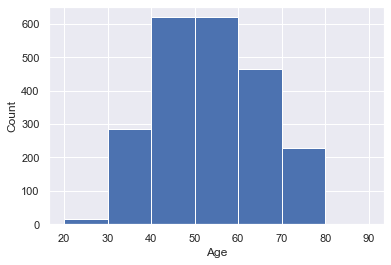

In [26]:
plt.hist(customer_df.Age, bins=bins_edges)
plt.xlabel('Age')
plt.ylabel('Count');

In [27]:
spent = pd.melt(customer_df[['Age_group', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold']], id_vars='Age_group', var_name='Shopping_list', value_vars=['Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold'], value_name='Expense')

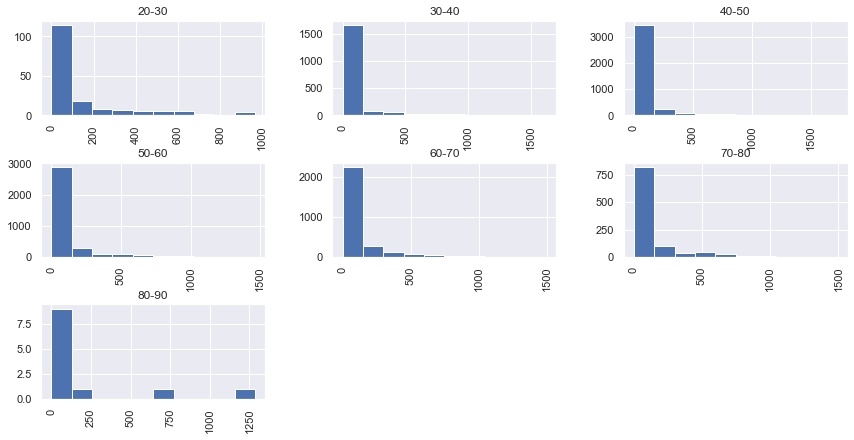

In [28]:
spent.hist(by='Age_group', bins=10, figsize=(14,7));

#### - A visual summary of the expenses of people in different age groups 

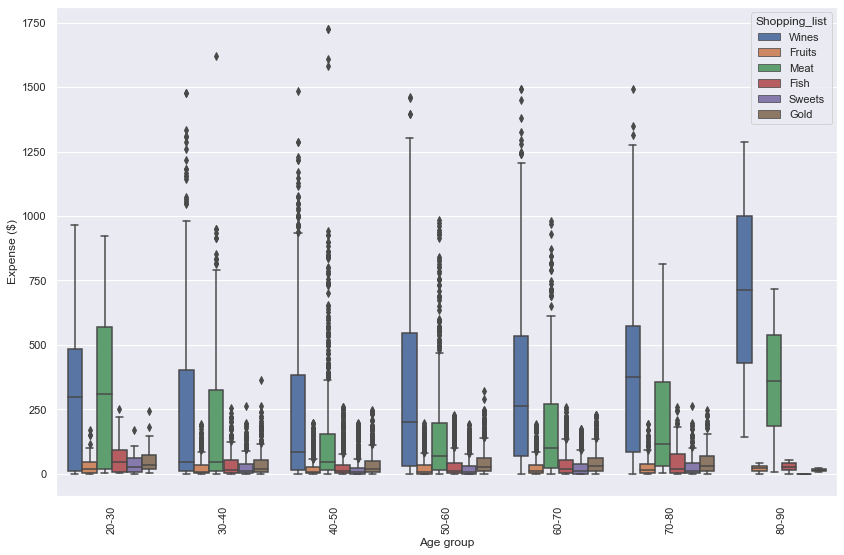

In [29]:
sns.set()
plt.subplots(figsize=(14, 9))
sns.boxplot(x='Age_group', y='Expense', hue='Shopping_list', data=spent)
plt.xticks(rotation='vertical')
plt.ylabel('Expense ($)')
plt.xlabel('Age group');

In [30]:
age_spent_mean = customer_df.groupby(['Age_group']).mean()

In [31]:
# young people spend more on meat and senior people spend more on wines...
age_spent_mean[['Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold']] 

,Wines,Fruits,Meat,Fish,Sweets,Gold
Age_group,,,,,,
20-30,308.785714,39.035714,314.321429,67.214286,39.821429,58.821429
30-40,250.635220,28.345912,183.078616,37.053459,28.808176,43.003145
40-50,241.923547,22.545872,141.108563,32.940367,24.050459,38.324159
50-60,320.434188,26.157265,154.627350,35.437607,25.856410,45.647863
60-70,364.854123,27.560254,180.801268,40.942918,28.824524,47.143763
70-80,406.853107,31.271186,211.237288,48.468927,32.700565,50.519774
80-90,714.500000,21.000000,361.500000,27.500000,0.000000,13.500000


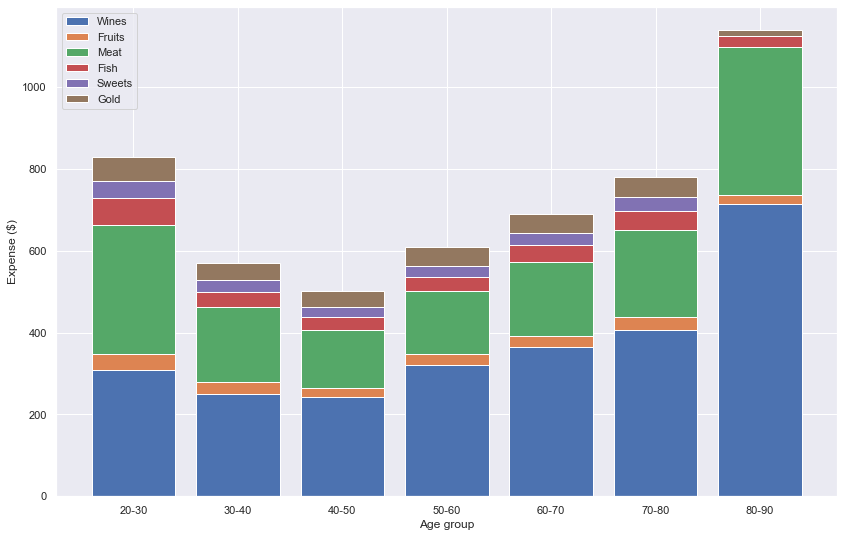

In [32]:
import matplotlib.ticker as mticker

fig, ax = plt.subplots(figsize=(14,9))
ax.bar(age_spent_mean.index, age_spent_mean['Wines'], label='Wines')
ax.bar(age_spent_mean.index, age_spent_mean['Fruits'], bottom=age_spent_mean['Wines'], label='Fruits')
ax.bar(age_spent_mean.index, age_spent_mean['Meat'], bottom=age_spent_mean['Wines'] + age_spent_mean['Fruits'], label='Meat')
ax.bar(age_spent_mean.index, age_spent_mean['Fish'], bottom=age_spent_mean['Wines'] + age_spent_mean['Fruits'] 
       + age_spent_mean['Meat'], label='Fish')
ax.bar(age_spent_mean.index, age_spent_mean['Sweets'], bottom=age_spent_mean['Wines'] + age_spent_mean['Fruits'] 
       + age_spent_mean['Meat'] + age_spent_mean['Fish'], label='Sweets')
ax.bar(age_spent_mean.index, age_spent_mean['Gold'], bottom=age_spent_mean['Wines'] + age_spent_mean['Fruits'] 
       + age_spent_mean['Meat'] + age_spent_mean['Fish'] + age_spent_mean['Sweets'], label='Gold')

#ax.set_xticklabels(age_spent_mean.index, rotation=90)
ax.set_xlabel('Age group')
ax.set_ylabel('Expense ($)')
ax.legend();

 - The figure above gives us a sense how the average expenses vary from young people to senior people as the following:
* Young people spend more on food (meat and fish) and senior people spend more on wines (less on sweets). 
* Middle-aged people spend the least. 

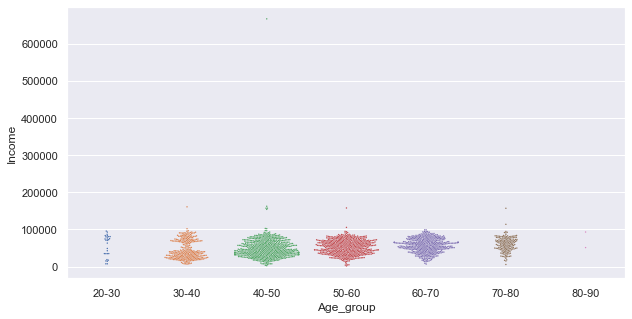

In [33]:
# categorical plot
plt.subplots(figsize=(10, 5))
sns.swarmplot(x='Age_group', y='Income', data=customer_df, size=1.4);

In [34]:
customer_df['Children'] = customer_df.Kidhome + customer_df.Teenhome

 -  People without children appear spend the most comapred to others.

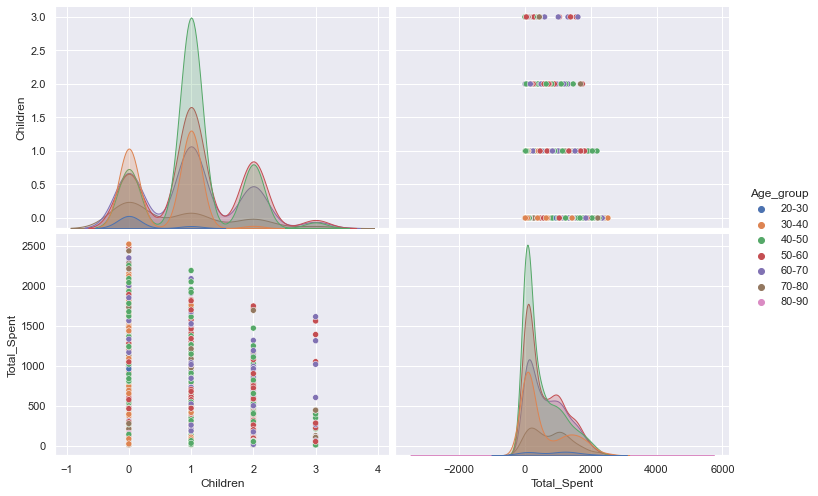

In [35]:
To_Plot = ["Age_group", 'Children', 'Total_Spent']
sns.pairplot(customer_df[To_Plot], hue="Age_group", height=3.5, aspect=1.5)

 - Drop columns

In [36]:
customer_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue',
       'AcceptedCmp6', 'Year', 'Age', 'Edu', 'Household', 'Days_Enrolled',
       'Total_Spent', 'Age_group', 'Children'],
      dtype='object')

In [37]:
# 'Income' greater than 300,000 are removed.
customer_df = customer_df[customer_df['Income'] < 300000] 

In [38]:
# df.Z_Revenue.max() # min/max= 11 
# df.Z_CostContact.value_counts() #3    2240    Name: Z_CostContact, dtype: int64
To_Drop = ['ID', 'Year_Birth', 'Education', 'Marital_Status','Kidhome', 'Teenhome', 'Dt_Customer', 'Recency',  'Complain', 'Z_CostContact', 'Z_Revenue']
customer_df.drop(columns=To_Drop, inplace=True)

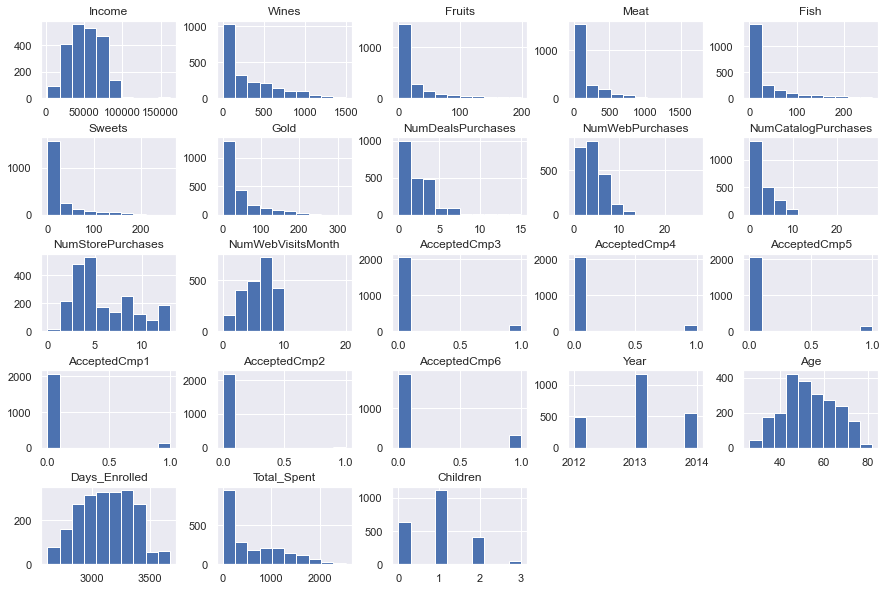

In [39]:
# `hist` method to plot histograms of each of the numeric features
# plt.subplots_adjust() with an argument hspace=0.5 to adjust the spacing
customer_df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

In [40]:
customer_df['Total_AcceptedCmp'] = customer_df['AcceptedCmp1'] + customer_df['AcceptedCmp2'] + customer_df['AcceptedCmp3']
+ customer_df['AcceptedCmp4'] + customer_df['AcceptedCmp5'] + customer_df['AcceptedCmp6']

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    1
2238    0
2239    1
Length: 2212, dtype: int64

In [1]:
# columns do not add much value to the data in terms of information. Therefore, drop those columns.
To_Drop = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6']
customer_df.drop(columns=To_Drop, inplace=True)

NameError: name 'customer_df' is not defined

### Saving data

In [42]:
customer_df.shape

(2212, 21)

In [43]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Income               2212 non-null   float64 
 1   Wines                2212 non-null   int64   
 2   Fruits               2212 non-null   int64   
 3   Meat                 2212 non-null   int64   
 4   Fish                 2212 non-null   int64   
 5   Sweets               2212 non-null   int64   
 6   Gold                 2212 non-null   int64   
 7   NumDealsPurchases    2212 non-null   int64   
 8   NumWebPurchases      2212 non-null   int64   
 9   NumCatalogPurchases  2212 non-null   int64   
 10  NumStorePurchases    2212 non-null   int64   
 11  NumWebVisitsMonth    2212 non-null   int64   
 12  Year                 2212 non-null   int64   
 13  Age                  2212 non-null   int64   
 14  Edu                  2212 non-null   object  
 15  Household            

In [44]:
customer_df.describe()

,Income,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Year,Age,Days_Enrolled,Total_Spent,Children,Total_AcceptedCmp
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,51958.810579,305.287523,26.329566,167.029837,37.648734,27.046564,43.925859,2.324593,4.088156,2.672242,5.806510,5.321429,2013.028029,53.086347,3126.144213,607.268083,0.947559,0.151447
std,21527.278844,337.322940,39.744052,224.254493,54.772033,41.090991,51.706981,1.924507,2.742187,2.927542,3.250939,2.425597,0.685926,11.701599,232.551465,602.513364,0.749466,0.410329
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,26.000000,2614.000000,5.000000,0.000000,0.000000
25%,35233.500000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,2013.000000,45.000000,2954.000000,69.000000,0.000000,0.000000
50%,51371.000000,175.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,2013.000000,52.000000,3127.000000,397.000000,1.000000,0.000000
75%,68487.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,2013.000000,63.000000,3300.000000,1048.000000,1.000000,0.000000
max,162397.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,2014.000000,82.000000,3677.000000,2525.000000,3.000000,3.000000


In [45]:
# save the data to a new csv file
datapath = './'
save_file(customer_df, 'customer_data_cleaned.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "./customer_data_cleaned.csv"


Inferences so far:
   - The dataset has 2212 rows & 21 columns.
   - Don’t have any missing values in the dataset.
   - We could see that the data is right skewed for most of the features (for most of the columns, the mean value is larger than median value (50th percentile: 50%). This is an indication that those features have a right skewed data).
   - There is a slight imbalance in the dataset (The number of middle aged people is more than that of young or senior people).